In [ ]:
1.single line plot

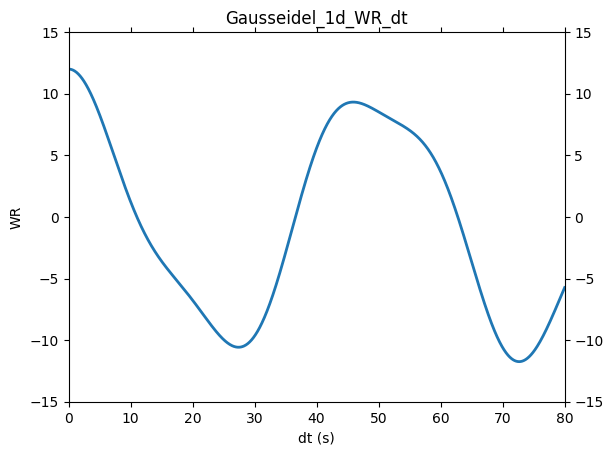

In [2]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager

dataframe = pd.read_csv("Gaus_WR_plot_res.csv",sep=',')
#print(dataframe.head(10))

#dataframe.columns  # show DataFrame with dataframe.columns

x = dataframe.dt
y = dataframe.WR 

plt.xlim(0,80)     # set x range
plt.ylim(-15,15)     # set y range

# Set the linewidth 
plt.plot(x, y, linewidth=2)

# Add x and y lables, and set their font size
plt.xlabel("dt (s)", fontsize=10)
plt.ylabel("WR", fontsize=10)
#plt.title("Jacobi_1d_WR_dt")


#top and right show ticks or values
ax = plt.gca()  # get current axes, --> move axes
ax.tick_params(top=True,labeltop=False,right=True,labelright = True)

plt.title("Gausseidel_1d_WR_dt")
#plt.scatter(x, y, )
plt.show() 

In [ ]:
# 2. combine three csv files and plot



In [ ]:
## 2.1 combine two csv files first;

In [32]:
'''
This program reads two csv files and merges them based on a common key column.
'''
# import the pandas library
# you can install using the following command: pip install pandas

import pandas as pd

# Read the files into two dataframes.
df1 = pd.read_csv('Gaus_WR_plot_res.csv')
df2 = pd.read_csv('Jacobi_WR_plot_res.csv')
#df3 = pd.read_csv('U_aN_plot_res.csv')

#df = pd.concat([df1, df2])
#df.to_csv('combined.csv')
# Merge the two dataframes, using dt column as key
df3 = pd.merge(df1, df2,on = 'dt')
df3.set_index('dt', inplace = True)

# Write it to a new CSV file
df3.to_csv('combined_g_j_dispalcement.csv')

In [ ]:
## 2.2 combine the above combines file1 and the newmark csv file

In [33]:
import pandas as pd

df0 = pd.read_csv('combined_g_j_dispalcement.csv')
df = pd.read_csv('U_dN_plot_res.csv')

df_c = pd.merge(df0,df, on = 'dt')
df_c.set_index('dt', inplace = True)

df_c.to_csv('combined_gjn_displacement.csv')

In [ ]:
##2.3 plot with above final combined csv file :combined_gjn_displacement.csv

0        0.00
1        0.01
2        0.02
3        0.03
4        0.04
        ...  
7996    79.96
7997    79.97
7998    79.98
7999    79.99
8000    80.00
Name: dt, Length: 8001, dtype: float64
0       12.00000
1       12.00000
2       11.99990
3       11.99990
4       11.99970
          ...   
7996    -5.78230
7997    -5.77052
7998    -5.75875
7999    -5.74698
8000    -5.73522
Name: WR_x, Length: 8001, dtype: float64


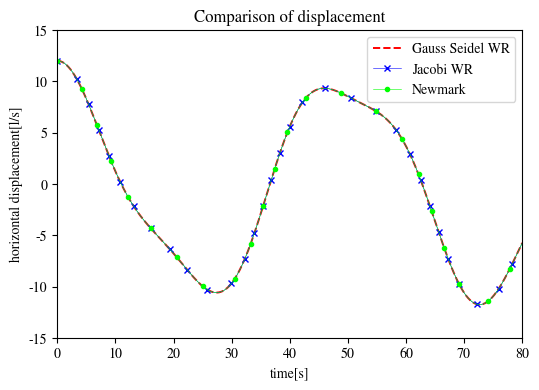

In [165]:
import csv
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['figure.figsize'] = (6.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False 
 
data = pd.read_csv('combined_gjn_displacement.csv')
 
xdata = []
y1data = []
y2data = []
y3data = []
xdata = data.loc[:, 'dt']
#xdata=0:0.3:80;
 
ydata = data.loc[:, 'WR_x']
y2data = data.loc[:, 'WR_y']
y3data = data.loc[:,'U_dN']
print(xdata)
print(ydata)#解决画多幅图时出现图形部分重叠

plt.plot(xdata, ydata, c='red',ls ='--', lw = 1.4, label=u'Gauss Seidel WR')
plt.plot(xdata, y2data, marker='x',markevery=0.05, markersize=4.0,c='blue',ls='-',lw=0.4,label="Jacobi WR")
plt.plot(xdata, y3data, marker='o',markevery=0.07,markersize=3.0,lw=0.4, c='lime',label="Newmark")
#plt.plot(x,y1,ls='--',lw=4,c='b',alpha=0.5,label='totm
plt.xlim(0,80)
plt.ylim(-15,15)

plt.title('Comparison of displacement', size=12)

plt.legend()
plt.xlabel(u'time[s]', size=10)
plt.ylabel(u'horizontal displacement[l/s]', size=10)
 
plt.show()